In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges


def draw_dot(root):
    dot = Digraph(format="png", graph_attr={"rankdir":"LR"})  # LR = left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name=uid, label="{%s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
        if n._operation:
            # if this value is a result of some operation, create an op node for it
            dot.node(name=uid + n._operation, label=n._operation)
            # and connect this node to it
            dot.edge(uid + n._operation, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._operation)

    return dot

In [3]:
class Value:
    def __init__(self, data, _children = (), _operation = "", label = ""):
        self.data = data
        self._prev = set(_children)
        self._operation = _operation
        self.label = label
        self.grad = 0.000
        
    def __repr__(self):
        result = f"Value(data = {self.data})"
        return result
    
    def __add__(self, other):
        addition = self.data + other.data
        operation = " + "
        children = (self, other)
        result = Value(data = addition, _children=children, _operation=operation)
        return result
    
    def __mul__(self, other):
        multiplication = self.data * other.data
        operation = " x "
        children = (self, other)
        result = Value(data = multiplication, _children=children, _operation=operation)
        return result
    
    def __neg__(self):
        # unary minus: -x
        operation = "neg"
        children = (self,)
        result = Value(data=-self.data, _children=children, _operation=operation)
        return result

    
    def __sub__(self, other):
        subtraction = self + (-other)
        return subtraction
    
    def __pow__(self, other):
        power = self.data**other
        children = (self, )
        label = " power "
        result = Value(data = power, _children=children, _operation=label)
        return result
    
    def __truediv__(self, other):
        power = -1.0
        result = self * other ** power
        return result
        
    def exp(self):
        e = math.exp(self.data)
        operation = " exp "
        children = (self, )
        result = Value(data = e, _children=children, _operation=operation)
        return result
        

In [103]:
a = Value(1.0, label = "a")
b = Value(2.0, label = "b")
c = Value(3.0, label = "c")
d = Value(4.0, label = "d")

y = a + b; y.label = "y"
fx = y * c; fx.label = "fx"
L = fx - y; L.label = "L"

O = L / d; O.label = "O"

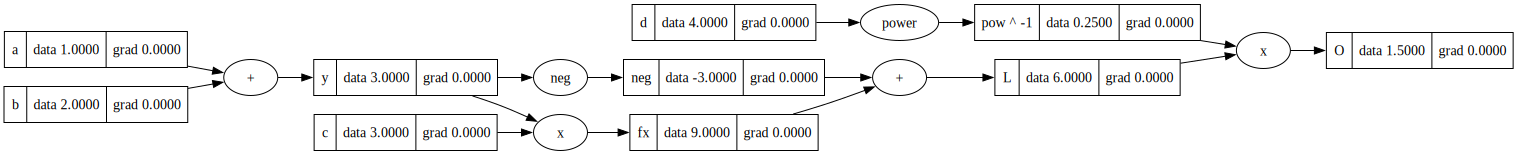

In [104]:
draw_dot(O)